##Lab 2: heart disease

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score


In [ ]:
df= pd.read_csv("/content/heart_2020_cleaned.csv")

The code chunk below balances an imbalanced dataset where the target variable is "HeartDisease". In your case, the "Yes" class (diagnosed) is much smaller than the "No" class (not diagnosed). The goal is to create a balanced 50-50 dataset for modeling.

In [ ]:
df_minority = df[df["HeartDisease"] == "Yes"]
df_majority = df[df["HeartDisease"] == "No"].sample(n=len(df_minority), random_state=42)

df_balanced = pd.concat([df_minority, df_majority])
Xn = df_balanced.drop(columns="HeartDisease")
yn = df_balanced["HeartDisease"]
yn = yn.map({"No": 0, "Yes": 1})
for col in Xn.columns:
    if Xn[col].dtype == 'object':
        Xn[col] = LabelEncoder().fit_transform(Xn[col])

In [21]:
df_minority = df[df["HeartDisease"] == "Yes"]
df_majority = df[df["HeartDisease"] == "No"].sample(n=len(df_minority), random_state=42)
df_balanced = pd.concat([df_minority, df_majority])

# Separate features and target
Xn = df_balanced.drop(columns="HeartDisease")
yn = df_balanced["HeartDisease"].map({"No": 0, "Yes": 1})

# Dummify categorical columns (one-hot encoding)
Xn = pd.get_dummies(Xn, drop_first=True)

split data into training and testing set to see the accuracy of the model

In [22]:
X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size=0.3, random_state=42)

now buiding a logistic model to create a baseline to see how the models perform

In [23]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Results:
Accuracy: 0.7683877252800779


In [24]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# F1 Score - focus on the positive (minority) class
f1 = f1_score(y_test, y_pred_log, pos_label=1)

print("Logistic Regression Results:")
print("F1 Score (Positive Class = Heart Disease):", round(f1, 3))

Logistic Regression Results:
F1 Score (Positive Class = Heart Disease): 0.773


now time to try gradient boosting

In [25]:
gb_model = GradientBoostingClassifier(n_estimators=400, learning_rate=.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Results:
Accuracy: 0.7688748173404774


In [26]:
f1 = f1_score(y_test, y_pred_gb, pos_label=1)
f1_weighted = f1_score(y_test, y_pred_gb, average='weighted')

# Output results
print("Gradient Boosting Results:")
print("F1 Score (Positive Class = Heart Disease):", round(f1, 5))
print("Weighted F1 Score:", round(f1_weighted, 3))

Gradient Boosting Results:
F1 Score (Positive Class = Heart Disease): 0.7752
Weighted F1 Score: 0.769


now lets try xd boosting

In [27]:
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3,
                    use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:34:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
Accuracy: 0.7687530443253775


In [28]:
f1 = f1_score(y_test, y_pred_xgb, pos_label=1)
f1_weighted = f1_score(y_test, y_pred_xgb, average='weighted')

# Output results
print("XGBoost Results:")
print("F1 Score (Positive Class = Heart Disease):", round(f1, 5))
print("Weighted F1 Score:", round(f1_weighted, 3))

XGBoost Results:
F1 Score (Positive Class = Heart Disease): 0.77505
Weighted F1 Score: 0.769


now lets try an ada boosting model

In [29]:
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

print("AdaBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))

AdaBoost Results:
Accuracy: 0.7609595713589868


In [30]:
f1 = f1_score(y_test, y_pred_ada, pos_label=1)
f1_weighted = f1_score(y_test, y_pred_ada, average='weighted')

# Output results
print("AdaBoost Results:")
print("F1 Score (Positive Class = Heart Disease):", round(f1, 3))
print("Weighted F1 Score:", round(f1_weighted, 3))

AdaBoost Results:
F1 Score (Positive Class = Heart Disease): 0.759
Weighted F1 Score: 0.761


we saw that the gradient boosting model has the highest accuracy and highest f1 score meaning that is did the best as predicting the heart risk for patients, with more weight into getting the 1's correct. so now lets look to see what the most important varaibles are for deciding heart disease risk for that model.

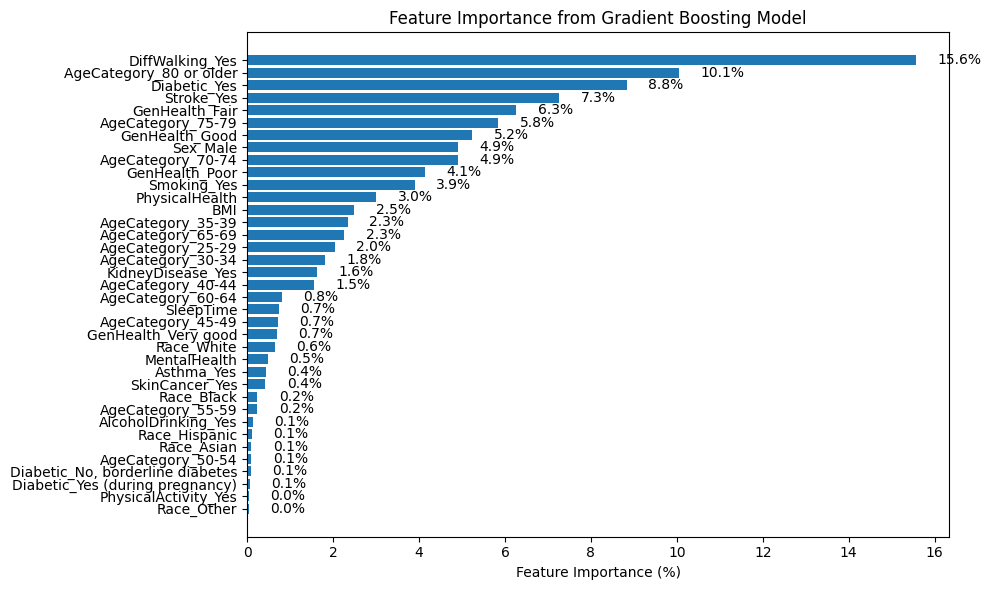

In [31]:
importances = gb_model.feature_importances_
feature_names = X_train.columns
sorted_idx = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_idx]
sorted_features = feature_names[sorted_idx]

# Convert to percentages
percent_importances = 100 * sorted_importances / sorted_importances.sum()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, percent_importances)

# Add percentage labels to bars
for bar, percent in zip(bars, percent_importances):
    plt.text(percent + 0.5, bar.get_y() + bar.get_height()/2, f"{percent:.1f}%", va='center')

plt.xlabel("Feature Importance (%)")
plt.title("Feature Importance from Gradient Boosting Model")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

From the feature importance chart, the biggest standout is whether someone has difficulty walking—it’s the most influential feature by a lot. Age also plays a huge role, especially people 80 or older. Diabetes, stroke history, and general health also have strong influence on the model’s predictions. Things like gender, smoking, and BMI show up in the middle range. Toward the bottom, features like skin cancer, alcohol use, and physical activity didn’t really have much importance.



****I tried to first tune the models one by one by changing each variable but each time it took a long time to run so I did not grid search.

and for fun lets apply the gradient model to the whole set of the data and see the f1 score it gets:

In [32]:
X_full = df.drop(columns="HeartDisease")
y_full = df["HeartDisease"]

# If any object columns remain in X_full, encode them
from sklearn.preprocessing import LabelEncoder

for col in X_full.columns:
    if X_full[col].dtype == 'object':
        X_full[col] = LabelEncoder().fit_transform(X_full[col])

y_full_numeric = y_full.map({"No": 0, "Yes": 1})


# Now compute F1 scores
f1 = f1_score(y_full_numeric, y_pred_full, pos_label=1)
f1_weighted = f1_score(y_full_numeric, y_pred_full, average='weighted')

print("Gradient Boosting on Full Dataset:")
print("F1 Score (Positive Class = Heart Disease):", round(f1, 3))
print("Weighted F1 Score:", round(f1_weighted, 3))

Gradient Boosting on Full Dataset:
F1 Score (Positive Class = Heart Disease): 0.347
Weighted F1 Score: 0.795


In [33]:
accuracy = accuracy_score(y_full_numeric, y_pred_full)
print("Accuracy:", round(accuracy, 3))

Accuracy: 0.739


When I applied the gradient boosting model to the full dataset, it got a weighted F1 score of 0.795, which makes sense since it’s doing well on the majority class. But the F1 score for predicting actual heart disease cases dropped to 0.347, showing it’s struggling to catch the positives. This is pretty typical when dealing with imbalanced data, and it suggests we might need to adjust the threshold or explore oversampling to improve recall.

I used chat to give me repeated code so each model has the same format, also used it to help pull out the varaible importance